In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import re,json,nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import warnings
warnings.simplefilter("ignore")
path ='/content/drive/MyDrive/Colab Notebooks/data and pickle files/'

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data and pickle files/cleaned_data.csv')
data.head(10)

,Unnamed: 0,comment,Category,Gender,comment react number,label,cleaned
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...
1,1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছি...
2,2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully,অরে বাবা এই টা কোন পাগল
3,3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully,ক্যাপ্টেন অফ বাংলাদেশ
4,4,পটকা মাছ,Politician,Male,0.0,troll,পটকা মাছ
5,5,অন্যরকম .. ভালো লাগলো ..❤️,Singer,Male,1.0,not bully,অন্যরকম ভালো লাগলো
6,6,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,Actor,Female,9.0,troll,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...
7,7,মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...,Actor,Female,0.0,not bully,মোহাম্মদ কফিল উদ্দীন মাহমুদ
8,8,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,Actor,Female,4.0,religious,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...
9,9,"হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে।",Social,Male,0.0,not bully,হিরো আলম তুমি এগিয়ে চলো আমরা আছি তোমার সাথে


In [ ]:
# Data cleaning function

def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("[" u"\U0001F600-\U0001F64F"  u"\u0600–\u06FF"  u"\U0001F300-\U0001F5FF"u"\u00C0-\u017F"  u"\U0001F1E0-\U0001F1FF" "]+",
                               flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)
    # text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)

    return text


def remove_punctuations(my_str):
    # define punctuation
    punctuations = "''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'“\’,<>./?@#$%^&*_~‘—॥”‰🤣❤️​⚽️✌�￰৷￰'''"
    # no_punct=punctuations.sub(r'', my_str)
    for p in punctuations:
        my_str = my_str.replace(p,' ') #Removing punctuations
    # no_punct=" "

    # for char in my_str:
    #     if char not in punctuations:
    #         no_punct = no_punct + char


    return my_str
def joining(text):
    out=' '.join(text)
    return out



def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
data['cleaned'] = data.comment.apply(lambda x: preprocessing((x)))

# data['cleaned'] = data.comment.apply(preprocessing)

In [ ]:


# print some cleaned reviews from the dataset
sample_data = [798,1005,150,2000,2500,4000,4500,5000,6000,6500,6660,6899,6400,7000,7500,8000]
for i in sample_data:
     print('Original:\n',data.comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n')

In [ ]:
data['cleaned'].tail(1100)

In [ ]:
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-d2ivkhuc/banglakit-lemmatizer_659c86c36f87442a860b63bd71494947
  Running command git clone --filter=blob:none --quiet https://github.com/banglakit/lemmatizer.git /tmp/pip-install-d2ivkhuc/banglakit-lemmatizer_659c86c36f87442a860b63bd71494947
  Resolved https://github.com/banglakit/lemmatizer.git to commit f94d8f8dfe06fac70fa151a46069888acffe8870
  Preparing metadata (setup.py) ... done
  Created wheel for banglakit-lemmatizer: filename=banglakit_lemmatizer-0.0.1-py3-none-any.whl size=117698 sha256=2d40a24f9e7bbb1bb69411abf00a043ff7336d6d5d860f2227d3ce72979a2e26
  Stored in directory: /tmp/pip-ephem-wheel-cache-7mvis296/wheels/a8/7c/4d/469b65c3a833f0620db622cb84ef76e2b0519d5efb677b93e7
Successfully built banglakit-lemmatizer


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('bengali')
sw

['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [ ]:
#Stopwords Removal
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in sw]

    out=' '.join(stm)

    return str(out)


In [ ]:
data['cleaned'] = data.cleaned.apply(lambda x: stopwordRemoval(str(x)))

In [ ]:
sample_data = [332,662,798,15357,227,500,200,5000,1000,20000,3000,350,4000,4500,5000,600,6500,70,7500,8001,10001]
for i in sample_data:
  print('Original: ',data.comment[i],'\nAfter preprocessing:',
           data.cleaned[i],'\n','Category:-- ',data.Category[i],'\n','Label:-- ',data.label[i],'\n')

Original:  আমরা বাকস্বাধীনতায় বিশ্বাসী৷ নাস্তিকতা নিয়ে শুধু আসিফ নয়, আরো অনেকের বক্তব্য প্রকাশ করা হয়েছে #dwAlaap এর চলতি সংখ্যায়৷ পাবেন এই লিংকে: www.dw.com/alaap 
After preprocessing: বাকস্বাধীনতায় বিশ্বাসী নাস্তিকতা আসিফ আরো অনেকের প্রকাশ হয়েছে চলতি সংখ্যায় পাবেন লিংকে 
 Category:--  Social 
 Label:--  religious 

Original:  চিকিৎসক-নার্স-কর্মীদের সুরক্ষা উপকরণ সরবরাহের নির্দেশ দিচ্ছে হাইকোর্ট।দোকান-মার্কেট বন্ধের ঘোষনা দিচ্ছে দোকান মালিক সমিতি।চিকিৎসক-নার্স-কর্মীদের সুরক্ষা উপকরণ দিচ্ছে বুয়েট।টেস্টিং কিট দিচ্ছে চীনের ‘আলীবাবা’।তাহলে সরকার করছেটা কি? 
After preprocessing: চিকিৎসক নার্স কর্মীদের সুরক্ষা উপকরণ সরবরাহের নির্দেশ দিচ্ছে হাইকোর্ট দোকান মার্কেট বন্ধের ঘোষনা দিচ্ছে দোকান মালিক সমিতি চিকিৎসক নার্স কর্মীদের সুরক্ষা উপকরণ দিচ্ছে বুয়েট টেস্টিং কিট দিচ্ছে চীনের আলীবাবা সরকার করছেটা 
 Category:--  Politician 
 Label:--  not bully 

Original:  মহান বিজয় দিবস এর শুভেচ্ছা ❤জয় বাংলা ❤জয় বঙ্গবন্ধু ❤ 
After preprocessing: মহান বিজয় দিবস শুভেচ্ছা জয় বাংলা জয় বঙ্গবন্ধু 
 Category:--  P

& lemmatization Stemming

In [ ]:
#importing stemmer
!pip install bangla-stemmer

In [ ]:
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [ ]:
data['cleaned']=data['cleaned'].apply(stem_text)

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first

In [ ]:
sample_data = [332,662,798,15357,227,500,200,5000,1000,20000,3000,350,4000,4500,5000,600,6500,70,7500,8001,10001]
for i in sample_data:
  print('Original: ',data.comment[i],'\nAfter preprocessing:',
           data.cleaned[i],'\n','Category:-- ',data.Category[i],'\n','Label:-- ',data.label[i],'\n')

Original:  আমরা বাকস্বাধীনতায় বিশ্বাসী৷ নাস্তিকতা নিয়ে শুধু আসিফ নয়, আরো অনেকের বক্তব্য প্রকাশ করা হয়েছে #dwAlaap এর চলতি সংখ্যায়৷ পাবেন এই লিংকে: www.dw.com/alaap 
After preprocessing: বাকস্বাধীনতায় বিশ্বাসী নাস্তিকতা আসিফ আরো অনেকের প্রকাশ হয় চলতি সংখ্যায় পাব লিং 
 Category:--  Social 
 Label:--  religious 

Original:  চিকিৎসক-নার্স-কর্মীদের সুরক্ষা উপকরণ সরবরাহের নির্দেশ দিচ্ছে হাইকোর্ট।দোকান-মার্কেট বন্ধের ঘোষনা দিচ্ছে দোকান মালিক সমিতি।চিকিৎসক-নার্স-কর্মীদের সুরক্ষা উপকরণ দিচ্ছে বুয়েট।টেস্টিং কিট দিচ্ছে চীনের ‘আলীবাবা’।তাহলে সরকার করছেটা কি? 
After preprocessing: চিকিৎসক নার্স কর্মী সুরক্ষা উপকরণ সরবরাহ নির্দেশ দেয় হাইকোর্ট দোকান মার্কেট বন্ধ ঘোষনা দেয় দোকান মালিক সমিতি চিকিৎসক নার্স কর্মী সুরক্ষা উপকরণ দেয় বুয়েট টেস্টিং কিট দেয় চীন আলীবাবা সরক করছে 
 Category:--  Politician 
 Label:--  not bully 

Original:  মহান বিজয় দিবস এর শুভেচ্ছা ❤জয় বাংলা ❤জয় বঙ্গবন্ধু ❤ 
After preprocessing: মহান বিজয় দিবস শুভেচ্ছা জয় বাংলা জয় বঙ্গবন্ধু 
 Category:--  Politician 
 Label:--  not bully 

O

In [ ]:
sample_corpora = data['cleaned'].values
sample_corpora

array(['হালা পুত মদ খাওয় সময় রাত বেলা মদ খাই দিন বেলা মাঝেমধ্যে খায় ম চ সময় একটু চুদাম ইচ্ছা চুদ লাইনে দার একজন একজন জাবি',
       'ঘরে শুট কেমন লাগ ক্যামেরা', 'অরে বাবা টা পাগল', ...,
       'হিরো ভাই এগা য়াও', 'হুম ভাও তোমরা এগা যাও তোমা পিছনে আছি',
       'হ্যালো তোমা সাথে চ্যাট'], dtype=object)

Data splitting Training and Testing


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned'], data['label'],test_size=0.2, random_state=42)

In [ ]:
X_train.head()

43501    এমন সতরকতা মুলক ও প্রয়োজনিয় মুলক পোষ্ট কর জন্য...
39403                       উফ আম নিষ্পাপ ঘুম ভেঙ্গে দিলা 
34086    বিক্রম             মিথিল ভোদায় তোম ধন   ডুকা প...
12520              তামাশা  তোম নুনু বড় হবে কইরোনা সেই আশা 
7419     নাস্তিক কনো পরিচয় নেই জুতা মারা দরক যা খুশি তা...
Name: cleaned, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
                                              #============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination():
    """
    This function consists the models defination for All gram Features

    Retuns:
        ml_models: list of models
        model_names: list of model_names

    """

    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Random Forest','Naive Bayes','KNN''lsvm_model','ksvm_model']
    model_names = ['KNN']
    # Create list of models
    #ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    ml_models = [knn_model]
    return ml_models,model_names


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred_y)
    my_dict['Accuracy'] = round(accuracy, 4) * 100
    precision = precision_score(y_test, pred_y, average='macro')
    my_dict['Precision'] = round(precision, 4) * 100

    # Calculate recall
    recall = recall_score(y_test, pred_y, average='macro')
    my_dict['Recall'] = round(recall, 4) * 100

# Calculate F1 score
    f1 = f1_score(y_test, pred_y, average='macro')
    my_dict['F1 Score'] = round(f1, 4) * 100


    return my_dict

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================

def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.

    Args:
        performance_dict: a dictionary of all the parameters for each models

    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
   #model_names = ['LR','DT','RF','MNB','KNN','lsvm_model','ksvm_model']
    model_names=['knn_model']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
 ## save the performance of the model for each gram feature
gram_names = ['Unigram','Bigram','Trigram']
#gram_names = ['Unigram']
ngrams = [(1,1),(1,2),(1,3)]
#ngrams = [(1,1)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(data.cleaned,gram)
    labels = label_encoding(data.label)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)


Feature Size :======> 56397

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 44001 
	Training		 39600 
	Test			 4401
Feature Size :======> 415317

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 44001 
	Training		 39600 
	Test			 4401
Feature Size :======> 949195

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 44001 
	Training		 39600 
	Test			 4401


In [ ]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")



========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score Model Name
0      62.1      64.67   57.45     59.37  knn_model

========In case of Unigram feature:========

Highest Accuracy achieved by knn_model at = 62.1
Highest F1-Score achieved by knn_model at = 59.37
Highest Precision Score achieved by knn_model at = 64.67
Highest Recall Score achieved by knn_model at = 57.45

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score Model Name
0     63.64      65.98   59.21     61.14  knn_model

========In case of Bigram feature:========

Highest Accuracy achieved by knn_model at = 63.63999999999999
Highest F1-Score achieved by knn_model at = 61.14000000000001
Highest Precision Score achieved by knn_model at = 65.98
Highest Recall Score achieved by knn_model at = 59.209999999999994

========== Performace Table for Trigram feature:========
    Accuracy  Precision  Recall  F1 Score Model Name
0     62.83    

In [ ]:
!pip install numba
!find / -iname 'libdevice'
!find / -iname 'libnvvm.so'

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
from pylab import imshow, show
from timeit import default_timer as timer

In [ ]:

def dataset_split(feature_space,label):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,label,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [ ]:

def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features .

    Args:
        reviews: a list of cleaned reviews

    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(reviews)

    return tfidf,X

In [ ]:
                                             #########  Classifiers Defination  #########
                                          #============================================
def ml_models_defination():
    """
    This function consists the models defination for All gram Features

    Retuns:
        ml_models: list of models
        model_names: list of model_names

    """

    # lr_model = LogisticRegression(random_state = 123)
    # dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    # rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    # mnb_model = MultinomialNB(alpha=0.15)
    # knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    #ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    # model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    model_names = ['Linear SVM']
    # Create list of models
    # ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    ml_models = [lsvm_model]
    return ml_models,model_names


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='macro'),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='macro'),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='macro'),4)*100

    return my_dict

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================

def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.

    Args:
        performance_dict: a dictionary of all the parameters for each models

    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    #model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    model_names = ['Linear SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
!nvidia-smi

In [ ]:
mandel_gpu = cuda.jit(device=True)(ml_models_defination)

In [ ]:

## save the performance of the model for each gram feature

#gram_names = ['Unigram','Bigram','Trigram']
gram_names = ['Trigram']
#ngrams = [(1,1),(1,2),(1,3)]
ngrams = [(1,3)]

for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(data.cleaned,gram)
   # labels = label_encoding(dataset.Tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,data['label'])

    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)
print(feature)

AttributeError: ignored

In [ ]:
# Load all the json files
#gram_names = ['Unigram','Bigram','Trigram']
gram_names = ['Tigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")

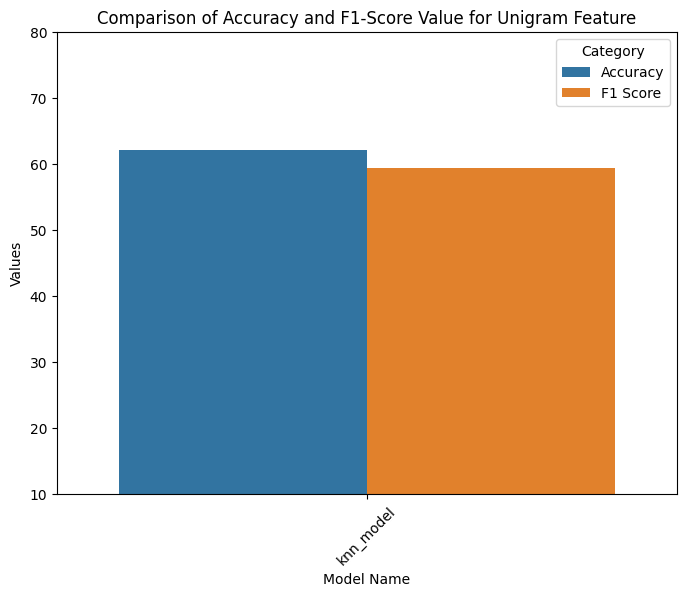

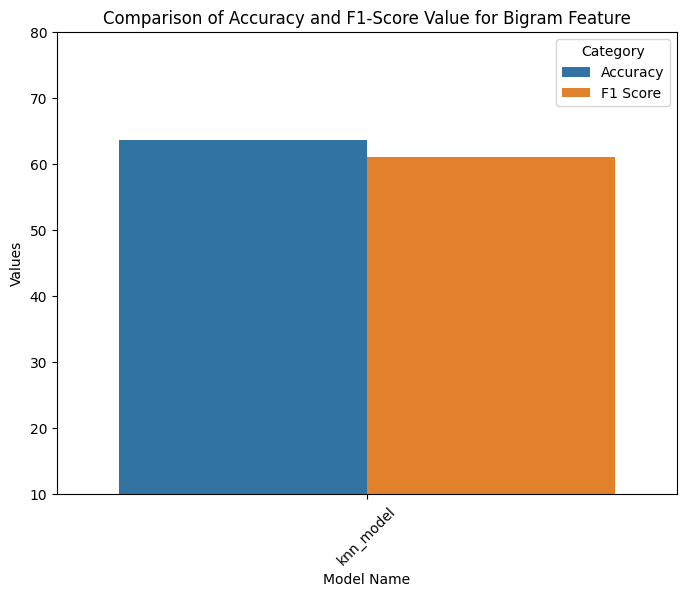

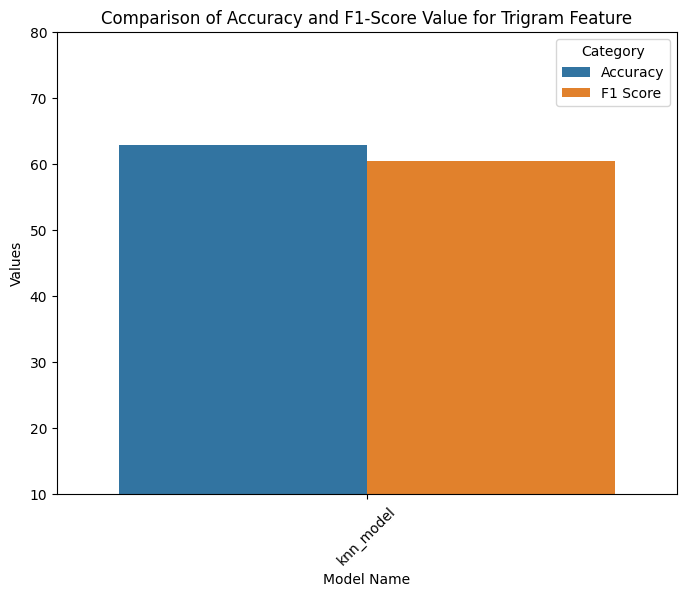

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name')
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);

Count Vectorizer

In [ ]:
print("Accuracy:", svm_a1,'\n'"Precision:", svm_p1,'\n'"Recall", svm_r1,'\n'"F1_Score", svm_f11)

In [ ]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm1.classes_)
display.plot()

Logistic Regression model

In [ ]:
#IMPLEMENTING AND RUNNNING LR MODEL - COUNT
lr1 = LogisticRegression()
lr1.fit(train_c, y_train)
prediction = lr1.predict(test_c)

In [ ]:
#EVALUATION
lr_a1 = accuracy_score(y_test, prediction)*100
lr_p1 = precision_score(y_test, prediction,pos_label=0,average='macro')* 100
lr_r1 = recall_score(y_test, prediction,average='macro')*100
lr_f11 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", lr_a1,'\n'"Precision:", lr_p1,'\n'"Recall", lr_r1,'\n'"F1_Score", lr_f11)

In [ ]:
print(classification_report(y_test,prediction))

In [ ]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_)
display.plot()

Random Forest classifier

In [ ]:
#IMPLEMENTING AND RUNNNING LR MODEL - COUNT
rf1 = RandomForestClassifier(n_estimators=500, criterion ='entropy', random_state = 0)
rf1.fit(train_c, y_train)
prediction = rf1.predict(test_c)

In [ ]:
#EVALUATION
rf_a1 = accuracy_score(y_test, prediction)*100
rf_p1 = precision_score(y_test, prediction,average='macro')* 100
rf_r1 = recall_score(y_test, prediction,average='macro')*100
rf_f11 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", rf_a1,'\n'"Precision:", rf_p1,'\n'"Recall", rf_r1,'\n'"F1_Score", rf_f11)

KNN model classifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn_model.fit(train_c, y_train)
prediction = knn_model.predict(test_c)


In [ ]:
#EVALUATION
knn_a1 = accuracy_score(y_test, prediction)*100
knn_p1 = precision_score(y_test, prediction,average='macro')* 100
knn_r1 = recall_score(y_test, prediction,average='macro')*100
knn_f11 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
my_dict = {}
my_dict['Accuracy'] = round(accuracy_score(y_test, prediction)*100)
my_dict['Precision'] = round(precision_score(y_test, prediction,average="weighted")* 100)
my_dict['Recall'] = round(recall_score(y_test, prediction,average="weighted")*100)
my_dict['F1 Score'] = round(f1_score(y_test, prediction,average="weighted")*100)

In [ ]:
my_dict

In [ ]:
shuffled_column = data['cleaned'].sample(frac=1).reset_index(drop=True)

# Assign the shuffled column back to the original dataframe
data['cleaned'] = shuffled_column

In [ ]:
data['cleaned']

0        হালা পুত মদ খাওয় সময় রাত বেলা মদ খাই দিন বেল...
1                                ঘরে শুট কেমন লাগ ক্যামেরা
2                                         অরে বাবা টা পাগল
3                                      ক্যাপ্ট অফ বাংলাদেশ
4                                                 পটকা মাছ
                               ...                        
43996                                     হিরো আলম এগা যাও
43997                 হিরো আলম সাপোর্ট অসংখ্য ধন্যবাদ আপনা
43998                                     হিরো ভাই এগা য়াও
43999                 হুম ভাও তোমরা এগা যাও তোমা পিছনে আছি
44000                               হ্যালো তোমা সাথে চ্যাট
Name: cleaned, Length: 44001, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(data['label'])

In [ ]:
def custom_tokenizer(text):
    # Split text into tokens (you can customize this based on your needs)
    tokens = text.split()
    return tokens

# Apply the custom tokenizer function to tokenize the 'cleaned' column
data['cleaned'] = data['cleaned'].apply(custom_tokenizer)

In [ ]:
X=data.cleaned

In [ ]:
X=data.cleaned
Y=encoded_labels

NameError: ignored

In [ ]:
X

0        হালা পুত মদ খাওয় সময় রাত বেলা মদ খাই দিন বেল...
1                                ঘরে শুট কেমন লাগ ক্যামেরা
2                                         অরে বাবা টা পাগল
3                                      ক্যাপ্ট অফ বাংলাদেশ
4                                                 পটকা মাছ
                               ...                        
43996                                     হিরো আলম এগা যাও
43997                 হিরো আলম সাপোর্ট অসংখ্য ধন্যবাদ আপনা
43998                                     হিরো ভাই এগা য়াও
43999                 হুম ভাও তোমরা এগা যাও তোমা পিছনে আছি
44000                               হ্যালো তোমা সাথে চ্যাট
Name: cleaned, Length: 44001, dtype: object

TFIDF VECTORIZER AND MODELING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,data['label'],train_size=0.8,test_size=0.2, random_state=42)

In [ ]:

def custom_tokenizer(text):
    return text.split()

# Create a TfidfVectorizer with the custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())

# Fit and transform the vectorizer on your training data
train_tf = vectorizer.fit_transform(X)

print('\nVocabulary: \n', vectorizer.vocabulary_)




Vocabulary: 
 {'হালা': 44765, 'পুত': 26112, 'মদ': 34244, 'খাওয়': 10973, 'সময়': 41344, 'রাত': 38142, 'বেলা': 32201, 'খাই': 10903, 'দিন': 20295, 'মাঝেমধ্যে': 34987, 'খায়': 11168, 'ম': 34098, 'চ': 13087, 'একটু': 5910, 'চুদাম': 14094, 'ইচ্ছা': 4463, 'চুদ': 14006, 'লাইনে': 38933, 'দার': 20055, 'একজন': 5874, 'জাবি': 16093, 'ঘরে': 12865, 'শুট': 40329, 'কেমন': 10041, 'লাগ': 38983, 'ক্যামেরা': 10459, 'অরে': 1577, 'বাবা': 30310, 'টা': 17026, 'পাগল': 25173, 'ক্যাপ্ট': 10444, 'অফ': 1217, 'বাংলাদেশ': 29613, 'পটকা': 24286, 'মাছ': 34958, 'অন্যরকম': 1088, 'ভালো': 33553, 'লাগলো': 39014, 'সাংবাদিক': 41773, 'ভাই': 33161, 'বল': 29106, 'সংবাদ': 40851, 'প্রচ': 26806, 'করলে': 8128, 'থ': 19391, 'গ্রেডের': 12751, 'অভিনেত্রী': 1439, 'অভিনেতা': 1437, 'দের': 21391, 'আপনা': 3042, 'জনপ্রিয়': 15472, 'শব্দ': 39773, 'কাস্টিং': 9327, 'কাউচ': 8722, 'সুযোগে': 42957, 'প্লিজ': 27445, 'তেলবাজি': 19117, 'নিউজ': 23279, 'ইম্পোরটেন্ট': 4789, 'দেয়া': 21513, 'বন্ধ': 28961, 'করুন': 8294, 'মোহাম্মদ': 36984, 'কফিল': 7637, 'উদ্দী

In [ ]:
train_tf

<44001x46060 sparse matrix of type '<class 'numpy.float64'>'
	with 446287 stored elements in Compressed Sparse Row format>

graph

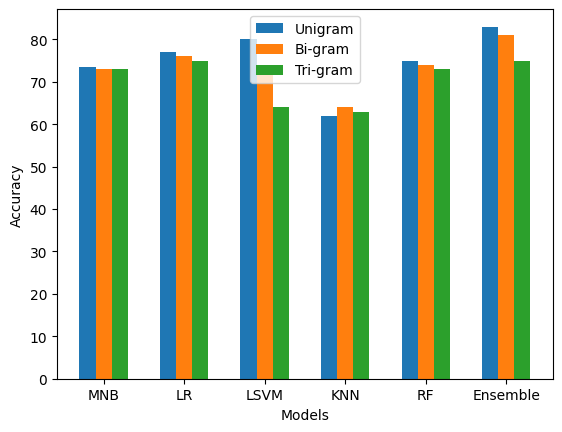

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their respective values
models = ['MNB', 'LR', 'LSVM', 'KNN', 'RF', 'Ensemble']
unigram_values = [73.62, 77, 80, 62, 75, 83]
bigram_values = [73, 76, 73, 64, 74, 81]
trigram_values = [73, 75, 64, 63, 73, 75]

# Set the width of the bars
bar_width = 0.2

# Set the x-axis positions for the bars
x = np.arange(len(models))

# Plot the values for each n-gram
plt.bar(x - bar_width, unigram_values, width=bar_width, label='Unigram')
plt.bar(x, bigram_values, width=bar_width, label='Bi-gram')
plt.bar(x + bar_width, trigram_values, width=bar_width, label='Tri-gram')

# Set the labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
#plt.title('Accuracy of Different Models with Unigram, Bi-gram, and Tri-gram')

# Set the x-axis ticks and labels
plt.xticks(x, models)

# Add a legend
plt.legend()

# Display the graph
plt.show()


In [ ]:
train_tf[0,8101]

0.0

In [ ]:
train_tf.shape

(44001, 46060)

In [ ]:
feature_names = TFIDF_vectorizer.get_feature_names_out()

# Print the feature names
print("Feature Names:")
for feature in feature_names:
    print(feature)

Streaming output truncated to the last 5000 lines.
সাক্ষাৎকারে
সাক্ষি
সাক্ষী
সাক্ষ্য
সাখাত
সাখিব
সাখে
সাখ্যী
সাগর
সাগরে
সাগরের
সাগল
সাগলের
সাগি
সাগুগুজু
সাগৱ
সাঙ্গপাঙ্গদের
সাচ্চা
সাচ্ছেন
সাজ
সাজগোজ
সাজছ
সাজছিস
সাজছে
সাজছেন
সাজছো
সাজটা
সাজতছ
সাজতি
সাজতে
সাজতেছ
সাজতেছিস
সাজতেছে
সাজতেছেন
সাজদা
সাজন
সাজবার
সাজবি
সাজবেন
সাজলে
সাজা
সাজাই
সাজাইছোকি
সাজাচ্ছিস
সাজাচ্ছে
সাজাচ্ছেন
সাজাতে
সাজান
সাজানো
সাজানো
সাজানোও
সাজাবেন
সাজার
সাজালে
সাজায়
সাজি
সাজিজের
সাজিদ
সাজিদ"
সাজিদআল্লাহ
সাজিদুল
সাজিদে
সাজিয়েছে
সাজিস
সাজিয়ে
সাজিয়েছে
সাজু
সাজুক
সাজুগুজু
সাজে
সাজেনা
সাজের
সাজেশন
সাজেশনস
সাজেস্ট
সাজো
সাজোগো
সাজোছ
সাজোন
সাজ্জাদ
সাটার
সাঠে
সাড়া
সাড়ে
সাত
সাতকাহন
সাতক্ষীরা
সাতক্ষীরার
সাতটা
সাতটি
সাতদিন
সাতদিনের
সাতশো
সাতা
সাতার
সাতাশ
সাতী
সাতে
সাতের
সাথ
সাথক
সাথা
সাথি
সাথী
সাথীদের
সাথে
সাথেআপনার
সাথেই
সাথেইতিহাস
সাথেও
সাথেক
সাথেতো
সাথেমায়ের
সাথের
সাথেসাথে
সাদ
সাদকা
সাদনার
সাদর
সাদা
সাদাকালো
সাদাকুল
সাদাত
সাদামাঠা
সাদারন
সাদা♥
সাদিকুর
সাদির
সাদিয়া
সাদিয়ার
সাদী
সাদু
সাদৃশ্য
সাদৃশ্যযুক্ত
সাদৃশ্যহীন
সাদেক
সাদেক্

In [ ]:
dense_features = train_tf.toarray()

# Print the dense matrix
print("TF-IDF Features (Dense Matrix):")
print(dense_features)

TF-IDF Features (Dense Matrix):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X[:3]

0    ওই হালা পুত এখন কি মদ খাওয় সময় রাত বেলা মদ খ...
1            ঘরে বসে শুট কর কেমন লাগ  ক্যামেরা কে ছিল 
2                         অরে বাবা  এই টা কোন পাগল    
Name: cleaned, dtype: object

In [ ]:
index = TFIDF_vectorizer.vocabulary_.get('হালার')
index

54886

In [ ]:
train_tf[1,15530]

0.0

In [ ]:
train_tf[0,8101]

0.1262662776978827

In [ ]:
train_tf.toarray()[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
all_feature_names = TFIDF_vectorizer.get_feature_names_out()
for word in all_feature_names:
    index = TFIDF_vectorizer.vocabulary_.get(word)
    print(f"{word} {TFIDF_vectorizer.idf_[index]}")


Streaming output truncated to the last 5000 lines.
সনতান 9.746080217357513
সনদপ্রাপ্ত 10.99884318585288
সনদোর 10.99884318585288
সননিকটে 10.99884318585288
সনমান 10.593378077744717
সনলান 10.99884318585288
সনাক্ত 10.99884318585288
সনাতন 10.593378077744717
সনাতনধর্ম 10.99884318585288
সনাতনী 10.593378077744717
সনাতনে 10.99884318585288
সনি 10.99884318585288
সনু 10.99884318585288
সনুনিগাম 10.99884318585288
সনে 10.99884318585288
সন্ততি 10.99884318585288
সন্তন 10.99884318585288
সন্তান 5.489454849224904
সন্তানঅনেক 10.99884318585288
সন্তানতীব্র 10.99884318585288
সন্তানম 10.99884318585288
সন্তানরা 10.99884318585288
সন্তানে 9.746080217357513
সন্তানের 10.99884318585288
সন্তানো 10.99884318585288
সন্তাসি 10.99884318585288
সন্তাসী 10.99884318585288
সন্তিনি 10.99884318585288
সন্তুষ্ 9.900230897184771
সন্তুষ্ট 9.61254882473299
সন্তুষ্ঠি 10.99884318585288
সন্তুস্ট 10.99884318585288
সন্তুুষ্ট 10.99884318585288
সন্তোষ 10.593378077744717
সন্ত্রস্ত 10.99884318585288
সন্ত্রাস 9.900230897184771
সন্ত্রাসবাদ 10.9

In [ ]:
train_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train_tf.shape

(44001, 56397)

In [ ]:
y_train

array([0, 0, 2, ..., 2, 0, 3])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_tf,data['label'],train_size=0.8,test_size=0.2, random_state=42)

SGD

Logistic Regression model

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
prediction = lr2.predict(X_test)

In [ ]:
#EVALUATION
lr_a2 = accuracy_score(y_test, prediction)*100
lr_p2 = precision_score(y_test, prediction,average='macro')* 100
lr_r2 = recall_score(y_test, prediction,average='macro')*100
lr_f12 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", lr_a2,'\n'"Precision:", lr_p2,'\n'"Recall", lr_r2,'\n'"F1_Score", lr_f12)

Accuracy: 79.40006817407112 
Precision: 82.7836074581549 
Recall 73.12959792198382 
F1_Score 76.53960118582353


k=5 fold

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
lr2 = LogisticRegression()

# Perform 5-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(lr2, X_train, y_train, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Fit the logistic regression model on the entire training data
lr2.fit(X_train, y_train)

# Make predictions on the test data
predictions = lr2.predict(X_test)


Cross-Validation Scores: [0.79005682 0.77755682 0.77684659 0.77784091 0.78607955]
Mean Accuracy: 0.7816761363636364


In [ ]:
lr_a2 = accuracy_score(y_test, prediction)*100
lr_p2 = precision_score(y_test, prediction,average='macro')* 100
lr_r2 = recall_score(y_test, prediction,average='macro')*100
lr_f12 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", lr_a2,'\n'"Precision:", lr_p2,'\n'"Recall", lr_r2,'\n'"F1_Score", lr_f12)

Accuracy: 79.76366322008862 
Precision: 83.5593954826147 
Recall 75.65022200186569 
F1_Score 78.74849786434834


SVM MODEL

In [ ]:
#IMPLEMENTING AND RUNNNING SVM MODEL - COUNT
svm2 = SVC(kernel='linear')
svm2.fit(X_train, y_train)
prediction = svm2.predict(X_test)

In [ ]:
pickle.dump(svm2, open('/content/drive/MyDrive/Colab Notebooks/data and pickle files/model/svm_model.pkl', 'wb'))
pickle.dump(vectorizer, open('/content/drive/MyDrive/Colab Notebooks/data and pickle files/model/vectorizer.pkl', 'wb'))

In [ ]:

import pickle

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Save the model to a specific path using pickle
model_path = '/content/drive/MyDrive/Colab Notebooks/data and pickle files/model/svm_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(svm_model, model_file)

print("SVM model saved to:", model_path)


SVM model saved to: /content/drive/MyDrive/Colab Notebooks/data and pickle files/model/svm_model.pkl


In [ ]:
# Load the saved SVM model using pickle
with open(model_path, 'rb') as model_file:
    loaded_svm_model = pickle.load(model_file)

# Now you can use loaded_svm_model for predictions


In [ ]:
X = 'ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা'

In [ ]:
TFIDF_vectorizer  = TfidfVectorizer(tokenizer=lambda x: x.split())

TFIDF_vectorizer.fit([X])

train_t = TFIDF_vectorizer.fit_transform([X])

In [ ]:


# Create or load your training data (X_train)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on your training data
X_train_transformed = vectorizer.fit_transform(X)

# Save the vectorizer using pickle
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Create a TfidfVectorizer with a custom tokenizer (splitting by whitespace)
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())

# Fit and transform the vectorizer on your training data
X_train_transformed = vectorizer.fit_transform(X)


In [ ]:
# Save the vectorizer using pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Define a tokenizer function
def custom_tokenizer(text):
    return text.split()

# Create a TfidfVectorizer with the custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

# Fit and transform the vectorizer on your training data
X_train_transformed = vectorizer.fit_transform(X)

# Save the vectorizer using pickle
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)



In [ ]:
train_tf

<1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

Vectorizer

In [ ]:
filename='vectorizer.pkl'
vector=TFIDF_vectorizer
pickle.dump(vector,open(filename,'wb'))


PicklingError: ignored

In [ ]:


# Make a prediction using the loaded SVM model
prediction = loaded_svm_model.predict(TFIDF_vectorizer.fit_transform([X]))

class_labels = ['not bully', 'religious', 'threat', 'troll', 'sexual']
predicted_class = class_labels[prediction[0]]

print("Predicted class:", predicted_class)


AttributeError: ignored

In [ ]:
import joblib

# Save the SVM model as a .pkl file
joblib.dump(svm2, 'svm_model.pkl')


['svm_model.pkl']

In [ ]:
# Load the SVM model from the .pkl file
loaded_svm_model = joblib.load('svm_model.pkl')

# Perform predictions using the loaded model
loaded_predictions = loaded_svm_model.predict(X_test)


In [ ]:
import joblib

# Specify the desired file path
save_path = r'/content/drive/MyDrive/Colab Notebooks/data and pickle files/model/svm_model.pkl'

# Save the SVM model to the specified path
joblib.dump(svm2, save_path)


['/content/drive/MyDrive/Colab Notebooks/data and pickle files/model/svm_model.pkl']

In [ ]:
# Create an instance of the logistic regression model
svm2 = SVC(kernel='linear')

# Perform 5-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(svm2, X_train, y_train, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Fit the logistic regression model on the entire training data
svm2.fit(X_train, y_train)

# Make predictions on the test data
predictions = lr2.predict(X_test)

Cross-Validation Scores: [0.7984375  0.78991477 0.78693182 0.79360795 0.79502841]
Mean Accuracy: 0.7927840909090909


In [ ]:
#EVALUATION
svm_a2 = accuracy_score(y_test, prediction)*100
svm_p2 = precision_score(y_test, prediction,average='macro')* 100
svm_r2 = recall_score(y_test, prediction,average='macro')*100
svm_f12 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", svm_a2,'\n'"Precision:", svm_p2,'\n'"Recall", svm_r2,'\n'"F1_Score", svm_f12)

Accuracy: 80.35450516986707 
Precision: 83.30241355550373 
Recall 76.16872494337272 
F1_Score 79.0090781918993


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

   not bully       0.76      0.90      0.82      3069
   religious       0.93      0.83      0.88      1457
      sexual       0.85      0.73      0.78      1803
      threat       0.89      0.62      0.73       312
       troll       0.73      0.70      0.72      2160

    accuracy                           0.80      8801
   macro avg       0.83      0.76      0.79      8801
weighted avg       0.80      0.80      0.79      8801



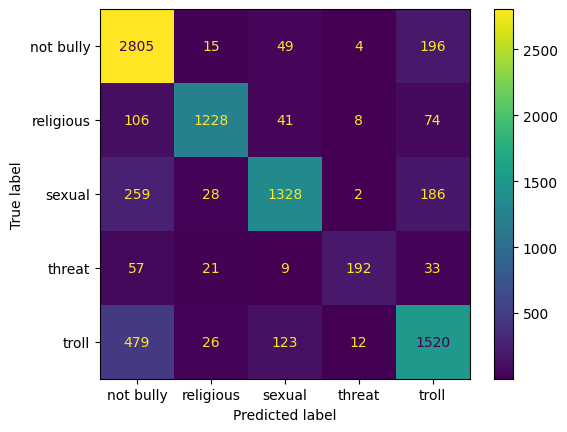

In [ ]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_,)
display.plot()

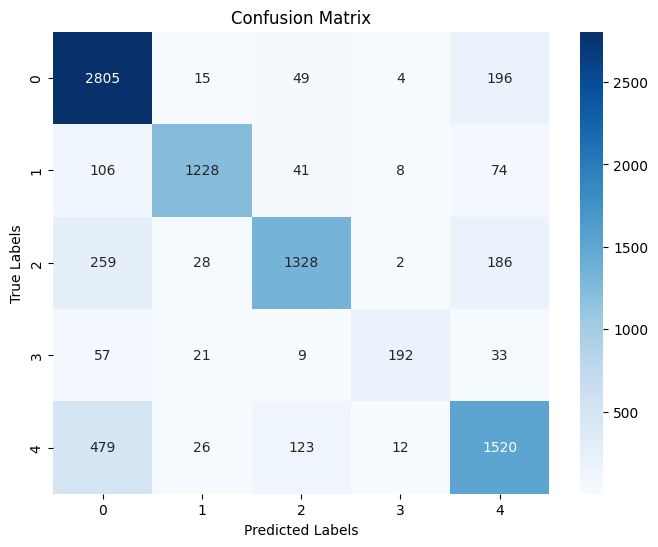

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, prediction)  # Replace y_true with true labels

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


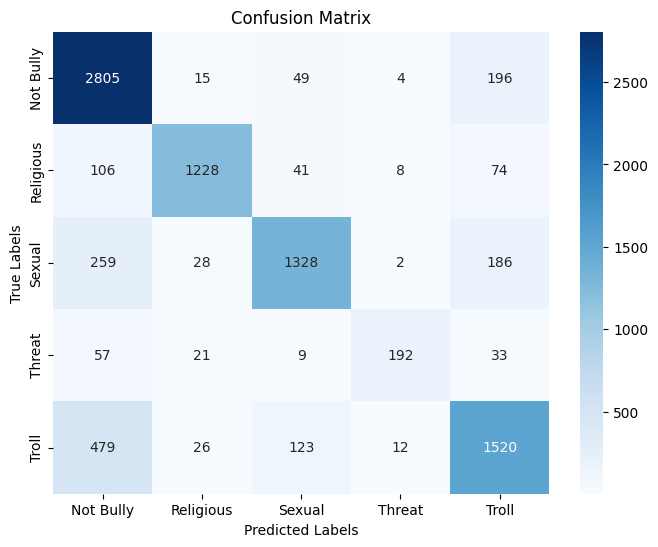

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ['Not Bully', 'Religious', 'Sexual', 'Threat', 'Troll']

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, prediction)

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier()

classifier.fit(X_train, y_train)

predicted_score = classifier.predict(X_test)

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, predicted_score)*100

78.92284967617316

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_score))

              precision    recall  f1-score   support

   not bully       0.73      0.93      0.81      3069
   religious       0.93      0.83      0.88      1457
      sexual       0.83      0.72      0.78      1803
      threat       0.88      0.55      0.68       312
       troll       0.78      0.65      0.71      2160

    accuracy                           0.79      8801
   macro avg       0.83      0.74      0.77      8801
weighted avg       0.80      0.79      0.79      8801



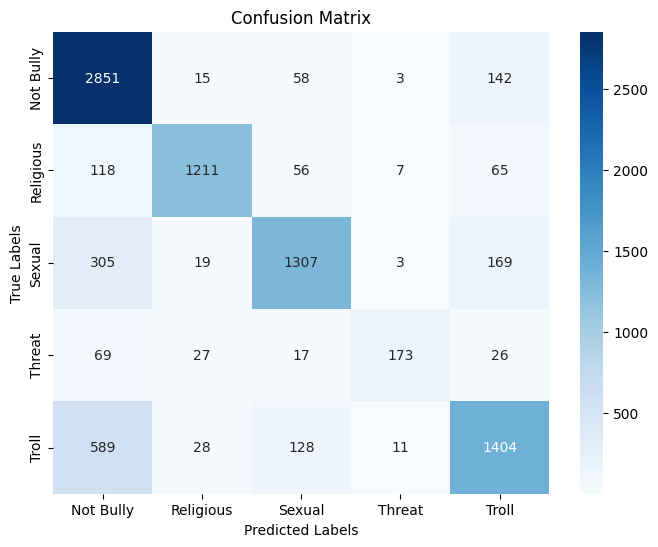

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ['Not Bully', 'Religious', 'Sexual', 'Threat', 'Troll']

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, predicted_score)

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
#IMPLEMENTING AND RUNNNING MNB MODEL - COUNT
mnb2 = MultinomialNB()
mnb2.fit(X_train, y_train)
prediction = mnb2.predict(X_test)

In [ ]:
#EVALUATION
mnb_a2 = accuracy_score(y_test, prediction)*100
mnb_p2 = precision_score(y_test, prediction,average='macro')* 100
mnb_r2 = recall_score(y_test, prediction,average='macro')*100
mnb_f12 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", mnb_a2,'\n'"Precision:", mnb_p2,'\n'"Recall", mnb_r2,'\n'"F1_Score", mnb_f12)

Accuracy: 72.1395295989092 
Precision: 77.19796546851316 
Recall 59.11119250757346 
F1_Score 60.110038029806326


In [ ]:
#IMPLEMENTING AND RUNNNING Rf MODEL - COUNT
rf2 = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
rf2.fit(X_train, y_train)
prediction = rf2.predict(X_test)

NameError: ignored

In [ ]:
#EVALUATION
rf_a2 = accuracy_score(y_test, prediction)*100
rf_p2 = precision_score(y_test, prediction,average='macro')* 100
rf_r2 = recall_score(y_test, prediction,average='macro')*100
rf_f12 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", rf_a2,'\n'"Precision:", rf_p2,'\n'"Recall", rf_r2,'\n'"F1_Score", rf_f12)

KNN model

In [ ]:
knn1_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn1_model.fit(train_tf, y_train)
prediction = knn1_model.predict(test_tf)

In [ ]:
#EVALUATION
knn_a2 = accuracy_score(y_test, prediction)*100
knn_p2 = precision_score(y_test, prediction,average='macro')* 100
knn_r2 = recall_score(y_test, prediction,average='macro')*100
knn_f12= f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", knn_a2,'\n'"Precision:", knn_p2,'\n'"Recall", knn_r2,'\n'"F1_Score", knn_f12)

Accuracy: 63.37196091797319 
Precision: 64.52732963356483 
Recall 57.68680003713694 
F1_Score 59.72956091164598


Ensemble method


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier


In [ ]:
# Below, random_state is only used to guarantee repeatable result for the tutorial.
rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees.
svmClf = SVC(kernel='linear',probability=True, random_state=0) # force a probability calculation
logClf = LogisticRegression(random_state=0)
SGD   =classifier
clf = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') # construct the ensemble classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

rfClf = RandomForestClassifier(n_estimators=500, random_state=0)
svmClf = SVC(kernel='linear', probability=True, random_state=0)
logClf = LogisticRegression(random_state=0)
SGD = SGDClassifier(random_state=0)

clf = VotingClassifier(estimators=[('rf', rfClf), ('svm', svmClf), ('log', logClf), ('sgd', SGD)], voting='soft')


In [ ]:
clf.fit(X_train, y_train) # train the ensemble classifier

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=0)),
                             ('log', LogisticRegression(random_state=0)),
                             ('sgd', SGDClassifier(random_state=0))],
                 voting='soft')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_true = y_test
y_pred = clf.predict(X_test)

print('Precision on the test set:', precision_score(y_true, y_pred, average='macro'))
print('Recall on the test set:', recall_score(y_true, y_pred, average='macro'))
print('F1 score on the test set:', f1_score(y_true, y_pred, average='macro'))
print('Accuracy on the test set:', accuracy_score(y_true, y_pred))


AttributeError: ignored

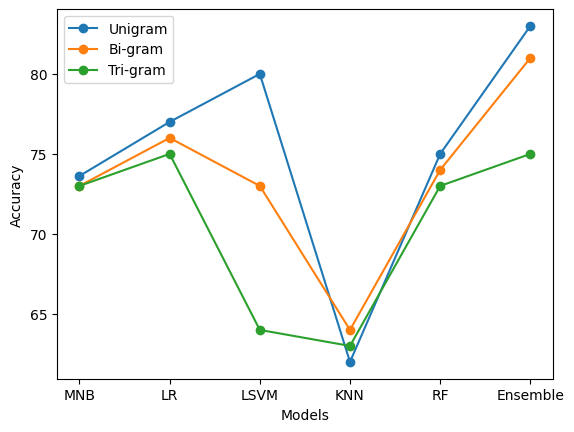

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their respective values
models = ['MNB', 'LR', 'LSVM', 'KNN', 'RF', 'Ensemble']
unigram_values = [73.62, 77, 80, 62, 75, 83]
bigram_values = [73, 76, 73, 64, 74, 81]
trigram_values = [73, 75, 64, 63, 73, 75]

# Set the x-axis values
x = range(len(models))

# Plot the values for each model
plt.plot(x, unigram_values, label='Unigram', marker='o')
plt.plot(x, bigram_values, label='Bi-gram', marker='o')
plt.plot(x, trigram_values, label='Tri-gram', marker='o')

# Set the labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
#plt.title('Accuracy of Models with Unigram, Bi-gram, and Tri-gram')

# Set the x-axis ticks and labels
plt.xticks(x, models)

# Add a legend
plt.legend()

# Display the graph
plt.show()


COMPARING ACCURACY With stopwords

In [ ]:
model_accuracy={'MNB': [round(mnb_a1), round(mnb_a2)],
                'SVM': [round(svm_a1), round(svm_a2)],
                'LR': [round(lr_a1), round(lr_a2)],
                 'RF': [round(rf_a1), round(rf_a2)],
                'KNN': [round(knn_a1), round(knn_a2)],
               }
ma = pd.DataFrame(model_accuracy, columns = ['MNB','SVM','LR','RF','KNN'], index=['Count Vectorizer','Tfidf Vectorizer'])
ma

In [ ]:
model_F1_Score={'MNB': [round(mnb_f11), round(mnb_f12)],
                'SVM': [round(svm_f11), round(svm_f12)],
                'LR': [round(lr_f11), round(lr_f12)],
                 'RF': [round(rf_f11), round(rf_f12)],
                'KNN': [round(knn_f11), round(knn_f12)],
               }
ma = pd.DataFrame(model_F1_Score, columns = ['MNB','SVM','LR','RF','KNN'], index=['Count Vectorizer-F1 Score','Tfidf Vectorizer F1-score'])
ma

In [ ]:
model_Score={'MNB': [round(mnb_a2), round(mnb_f12),round(mnb_p2), round(mnb_r2)],
                'SVM':[round(svm_a2), round(svm_f12),round(svm_p2), round(svm_r2)],
                'LR': [round(lr_a2), round(lr_f12),round(lr_p2), round(lr_r2)],
                 'RF':  [round(rf_a2),round(rf_f12),round(rf_p2), round(rf_r2)],
                'KNN':  [round(knn_a2),round(knn_f12),round(knn_p2) ,round(knn_r2)],
               }
ma = pd.DataFrame(model_Score, columns = ['MNB','SVM','LR','RF','KNN'], index=['Acurracy','F1 Score','Precision','Recall'])
ma

# Tf IDF Without Stopwords

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['cleanText'], data['label'],test_size=0.2, random_state=42)

In [ ]:
TFIDF_vectorizer  = TfidfVectorizer(tokenizer=lambda x: x.split())

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf_idf = TFIDF_vectorizer.fit_transform(X_train)
test_tf_idf = TFIDF_vectorizer.transform(X_test)

Logistic Regression Model

In [ ]:
lr2 = LogisticRegression()
lr2.fit(train_tf_idf, y_train)
prediction = lr2.predict(test_tf_idf)

In [ ]:
#EVALUATION
lr_a2 = accuracy_score(y_test, prediction)*100
lr_p2 = precision_score(y_test, prediction,average='macro')* 100
lr_r2 = recall_score(y_test, prediction,average='macro')*100
lr_f12 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", lr_a2,'\n'"Precision:", lr_p2,'\n'"Recall", lr_r2,'\n'"F1_Score", lr_f12)

SVM Model

In [ ]:
#IMPLEMENTING AND RUNNNING SVM MODEL - COUNT
svm2 = SVC(kernel='linear')
svm2.fit(train_tf_idf, y_train)
prediction = svm2.predict(test_tf_idf)

In [ ]:
#EVALUATION
svm_a2 = accuracy_score(y_test, prediction)*100
svm_p2 = precision_score(y_test, prediction,average='macro')* 100
svm_r2 = recall_score(y_test, prediction,average='macro')*100
svm_f12 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", svm_a2,'\n'"Precision:", svm_p2,'\n'"Recall", svm_r2,'\n'"F1_Score", svm_f12)

In [ ]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_)
display.plot()

In [ ]:
#IMPLEMENTING AND RUNNNING MNB MODEL - COUNT
mnb2 = MultinomialNB()
mnb2.fit(train_tf_idf, y_train)
prediction = mnb2.predict(test_tf_idf)

In [ ]:
#EVALUATION
mnb_a2 = accuracy_score(y_test, prediction)*100
mnb_p2 = precision_score(y_test, prediction,average='macro')* 100
mnb_r2 = recall_score(y_test, prediction,average='macro')*100
mnb_f12 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", mnb_a2,'\n'"Precision:", mnb_p2,'\n'"Recall", mnb_r2,'\n'"F1_Score", mnb_f12)

In [ ]:
#IMPLEMENTING AND RUNNNING Rf MODEL - COUNT
rf2 = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
rf2.fit(train_tf_idf, y_train)
prediction = rf2.predict(test_tf_idf)

In [ ]:
#EVALUATION
rf_a2 = accuracy_score(y_test, prediction)*100
rf_p2 = precision_score(y_test, prediction,average='macro')* 100
rf_r2 = recall_score(y_test, prediction,average='macro')*100
rf_f12 = f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", rf_a2,'\n'"Precision:", rf_p2,'\n'"Recall", rf_r2,'\n'"F1_Score", rf_f12)

KNN MODEL

In [ ]:
knn1_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn1_model.fit(train_tf_idf, y_train)
prediction = knn1_model.predict(test_tf_idf)

In [ ]:
#EVALUATION
knn_a2 = accuracy_score(y_test, prediction)*100
knn_p2 = precision_score(y_test, prediction,average='macro')* 100
knn_r2 = recall_score(y_test, prediction,average='macro')*100
knn_f12= f1_score(y_test, prediction,average='macro')*100

In [ ]:
print("Accuracy:", knn_a2,'\n'"Precision:", knn_p2,'\n'"Recall", knn_r2,'\n'"F1_Score", knn_f12)

In [ ]:
model_Score={'MNB': [ round(mnb_a2),round(mnb_f12),round(mnb_p2), round(mnb_r2)],
                'SVM': [ round(svm_a2),round(svm_f12),round(svm_p2), round(svm_r2)],
                'LR': [ round(lr_a2),round(lr_f12),round(lr_p2), round(lr_r2)],
                 'RF':  [round(rf_a2),round(rf_f12),round(rf_p2), round(rf_r2)],
                'KNN': [round(knn_a2),round(knn_f12),round(knn_p2) ,round(knn_r2)],
               }
ma = pd.DataFrame(model_Score, columns = ['MNB','SVM','LR','RF','KNN'], index=['Accuracy','F1 Score','Precision','Recall'])
ma

check classification using SVM model

In [ ]:
processed_review="ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা"

In [ ]:
cv = TfidfVectorizer(tokenizer=lambda x: x.split())
cv.fit(X_train)
train_tf_idf = TFIDF_vectorizer.fit_transform(X_train)
test_tf_idf = TFIDF_vectorizer.transform([processed_review])

#feature = cv.transform([processed_review]).toarray()


label = svm2.predict(test_tf_idf)

In [ ]:
svm2.fit(train_tf_idf, y_train)

In [ ]:
pre = svm2.predict(test_tf_idf)

word2vec

In [ ]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string


In [ ]:

gensim.__version__



In [ ]:

import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

In [ ]:
!pip install bnlp_toolkit

In [ ]:
from bnlp import BengaliWord2Vec

bwv = BengaliWord2Vec()

In [ ]:

!mkdir models
%cd models


In [ ]:

!wget https://huggingface.co/sagorsarker/bangla_word2vec/resolve/main/bangla_word2vec_gen4.zip
!unzip bangla_word2vec_gen4.zip
!rm -rf bangla_word2vec_gen4.zip

In [ ]:

!wget https://huggingface.co/sagorsarker/bangla-fasttext/resolve/main/bengali_fasttext_wiki.zip
!unzip bengali_fasttext_wiki.zip
!rm -rf bengali_fasttext_wiki.zip

In [ ]:

%cd ..

In [ ]:
word = 'আমি', 'ভাত', 'খাই', '।', 'সে', 'বাজারে', 'যায়', '।', 'তিনি', 'কি', 'সত্যিই', 'ভালো', 'মানুষ', '?'
'আমি ভাত খাই।', 'সে বাজারে যায়।', 'তিনি কি সত্যিই ভালো মানুষ?'

In [ ]:
model_path  = '/content/models/bangla_word2vec/bnwiki_word2vec.model'

In [ ]:
vector = bwv.generate_word_vector(model_path, word)
print(vector.shape)
print(vector)

In [ ]:
wv.save('/content/drive/MyDrive/Colab Notebooks/NLP Projects/vectors.kv')

In [ ]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res


In [ ]:
data['vec'] = data['cleanText'].apply(sent_vec)

In [ ]:
# Encoding the label column
data['label']=data['label'].map({'not bully':0,'troll':1,'religious':2,'sexual':3, 'threat':4})

In [ ]:
X=data['cleaned']
y=data['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = True)

In [ ]:
TFIDF_vectorizer  = TfidfVectorizer(tokenizer=lambda x: x.split())

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf_idf = TFIDF_vectorizer.fit_transform(X_train)
test_tf_idf = TFIDF_vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier()

classifier.fit(train_tf_idf, y_train)

predicted_score = classifier.predict(test_tf_idf)

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, predicted_score)*100


In [ ]:
data['vec']

In [ ]:

X = data['vec'].to_list()
y = data['label'].to_list()


In [ ]:
y


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split (data['cleanText'], data['label'] , test_size=0.2)


In [ ]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted,average='macro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted,average='macro'))
